# dogs_vs_cats Dataset

### Importa as funções que vamos utilizar

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score

from tensorflow.keras.models import model_from_json
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

### Criar o modelo
Documentação:
    - Conv2D: https://keras.io/layers/convolutional/
    - MaxPooling2D: https://keras.io/layers/pooling/
    - Dense e Flatten: https://keras.io/layers/core/
    - compile: https://keras.io/models/sequential/
    - Optimizer: https://keras.io/optimizers/

In [2]:
classificador = Sequential()

classificador.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3), 
        input_shape=(224, 224, 3), 
        activation = 'relu'
    ))

classificador.add(
    MaxPooling2D(
        pool_size=(2,2)
    ))

classificador.add(
    Conv2D(
        filters=64,
        kernel_size=(3,3), 
        activation = 'relu'
    ))

classificador.add(
    MaxPooling2D(
        pool_size=(2,2)
    ))


classificador.add(
    Flatten())

classificador.add(
    Dense(
        units=128, 
        activation = 'relu'
         ))

classificador.add(
    Dropout(
        rate=0.25
    ))

classificador.add(
    Dense(
        units=128, 
        activation = 'relu'
         ))

classificador.add(
    Dropout(
        rate=0.25
    ))

classificador.add(
    Dense(
        units = 1, # Número de classes
        activation = 'sigmoid'
    ))

classificador.compile(
    loss='binary_crossentropy', # binary_crossentropy porque estamos trabalhando com um problema de 2 classes
    optimizer='adam', # sgd ou adam
    metrics=['accuracy']
)

classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Criar o gerador de imagens
O Gerador é responsável por ler as imagens e fornecer para nossa rede neural, podendo ou não realziar data augmentation

https://keras.io/preprocessing/image/

In [3]:
gerador_treinamento = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 7,
    horizontal_flip = True,
    shear_range = 0.2,
    height_shift_range = 0.07,
    zoom_range = 0.2)

gerador_teste = ImageDataGenerator(rescale = 1./255)

In [4]:
base_treinamento = gerador_treinamento.flow_from_directory(
    directory='datasets/dogs_vs_cats/train',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'binary',
    #save_to_dir='datasets/dogs_vs_cats/augmentation'
)

base_teste = gerador_teste.flow_from_directory(
    directory='datasets/dogs_vs_cats/test',
    target_size = (224, 224),
    batch_size = 128,
    class_mode = 'binary',
    shuffle=False)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Treina a rede neural
https://keras.io/models/sequential/

In [5]:
history = classificador.fit(
    x = base_treinamento,
    validation_data = base_teste,
    epochs = 50
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 32 steps, validate for 8 steps
Epoch 1/50
32/32 [==============================] - 40s 1s/step - loss: 0.8781 - accuracy: 0.5135 - val_loss: 0.6818 - val_accuracy: 0.5010
Epoch 2/50
32/32 [==============================] - 38s 1s/step - loss: 0.6673 - accuracy: 0.5750 - val_loss: 0.6578 - val_accuracy: 0.6250
Epoch 3/50
32/32 [==============================] - 38s 1s/step - loss: 0.6577 - accuracy: 0.6175 - val_loss: 0.6599 - val_accuracy: 0.6250
Epoch 4/50
32/32 [==============================] - 38s 1s/step - loss: 0.6386 - accuracy: 0.6403 - val_loss: 0.6213 - val_accuracy: 0.6590
Epoch 5/50
32/32 [==============================] - 38s 1s/step - loss: 0.6074 - accuracy: 0.6787 - val_loss: 0.6078 - val_accuracy: 0.6890
Epoch 6/50
32/32 [==============================] - 38s 1s/step - loss: 0.5670 - accuracy: 0.7180 - val_loss: 0.5506 - val_accuracy: 0.7310
Epoch 7/50
32/32 [==============================] - 38s 1s/step - los

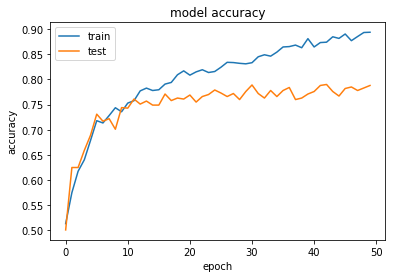

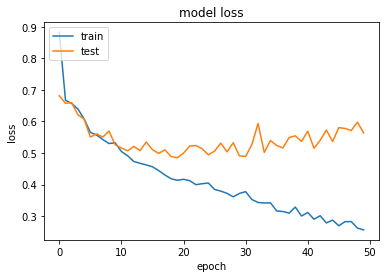

In [6]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Avaliar o modelo

In [7]:
# Reinicia o gerador de imagem de teste 
base_teste.reset()

# Faz a previsão dsa imagens de teste usando o modelo
previsao = classificador.predict(base_teste)
print(f"Probabilidade da primeira imagem pertencer a cada classe: {previsao[0]}")

# Retorna a classe com maior probabilidade
previsao = np.around(previsao)
print(f"Classe da primeira imagem: {previsao[0]}\n\n")

Probabilidade da primeira imagem pertencer a cada classe: [0.02790158]
Classe da primeira imagem: [0.]




In [8]:
print('Confusion Matrix')
print(confusion_matrix(base_teste.classes, previsao))

print(f'\nAccuracy {accuracy_score(base_teste.classes, previsao)}')

print(f'\nBalanced Accuracy {balanced_accuracy_score(base_teste.classes, previsao)}')

print('\nClassification Report')
print(classification_report(base_teste.classes, previsao, target_names=base_treinamento.class_indices.keys()))

Confusion Matrix
[[395 105]
 [107 393]]

Accuracy 0.788

Balanced Accuracy 0.788

Classification Report
              precision    recall  f1-score   support

         cat       0.79      0.79      0.79       500
         dog       0.79      0.79      0.79       500

   micro avg       0.79      0.79      0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



### Salvar a rede neural

In [9]:
classificador_json = classificador.to_json()
with open('classificador_dog_cat.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_dog_cat.h5')

### Ler a rede neural salva

In [10]:
arquivo = open('classificador_dog_cat.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

classificador = model_from_json(estrutura_rede)
classificador.load_weights('classificador_dog_cat.h5')

In [11]:
classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               23888000  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Testar com uma imagem nova

In [12]:
## Ler a imagem

imagem_teste = image.load_img(
    path='datasets/dogs_vs_cats/test/dog/dog.3500.jpg',
    target_size = (224,224)
)

#imagem_teste.show()

## Converter para matriz de números
imagem_teste = image.img_to_array(imagem_teste)

## Deixar os valores dos pixels [0,1], igual feito no rescale do ImageDataGenerator
imagem_teste /= 255
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

previsao = classificador.predict(imagem_teste)
print(previsao)
print(np.argmax(previsao))

base_treinamento.class_indices

[[0.281416]]
0


{'cat': 0, 'dog': 1}